In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1. Load data ke Python**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/no_show_appointments.csv', index_col=0)
data

,NomorAppointment,JenisKelamin,TanggalPembuatan,TanggalAppointment,Umur,Daerah,Beasiswa,DarahTinggi,Diabetes,Alkohol,Disabled,SMS_received,No-show
NomorPasien,,,,,,,,,,,,,
2.143110e+13,5611376,F,2016-04-25T07:08:41Z,2016-05-25T00:00:00Z,43,Bidara Cina,0,0,0,0,0,1,No
2.839350e+13,5629135,M,2016-04-27T12:50:39Z,2016-04-29T00:00:00Z,78,Harapan Mulia,0,1,1,0,0,0,No
3.487580e+13,5686183,M,2016-05-11T12:18:24Z,2016-05-17T00:00:00Z,58,Cililitan,0,1,0,0,0,0,No
8.356730e+13,5729853,F,2016-05-24T07:54:37Z,2016-05-24T00:00:00Z,22,Cempaka Baru,0,0,0,0,0,0,No
9.186880e+14,5690145,F,2016-05-12T09:34:57Z,2016-05-12T00:00:00Z,30,Cijantung,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.963580e+12,5640115,F,2016-04-29T10:08:27Z,2016-05-03T00:00:00Z,87,Cipedak,0,0,0,0,0,1,No
4.122330e+11,5565723,F,2016-04-11T09:18:53Z,2016-05-13T00:00:00Z,33,Cilandak Barat,0,0,0,0,0,0,Yes
4.542430e+12,5694002,F,2016-05-13T07:58:37Z,2016-05-18T00:00:00Z,29,Cipinang Besar Selatan,0,0,0,0,0,0,No


In [ ]:
data.columns = [c.strip().lower().replace('-','_') for c in data.columns]
data['no_show'].replace(['No', 'Yes'], [0,1], inplace = True)
data['jeniskelamin'].replace(['M', 'F'], [0,1], inplace = True)
data

,nomorappointment,jeniskelamin,tanggalpembuatan,tanggalappointment,umur,daerah,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show
NomorPasien,,,,,,,,,,,,,
2.143110e+13,5611376,1,2016-04-25T07:08:41Z,2016-05-25T00:00:00Z,43,Bidara Cina,0,0,0,0,0,1,0
2.839350e+13,5629135,0,2016-04-27T12:50:39Z,2016-04-29T00:00:00Z,78,Harapan Mulia,0,1,1,0,0,0,0
3.487580e+13,5686183,0,2016-05-11T12:18:24Z,2016-05-17T00:00:00Z,58,Cililitan,0,1,0,0,0,0,0
8.356730e+13,5729853,1,2016-05-24T07:54:37Z,2016-05-24T00:00:00Z,22,Cempaka Baru,0,0,0,0,0,0,0
9.186880e+14,5690145,1,2016-05-12T09:34:57Z,2016-05-12T00:00:00Z,30,Cijantung,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.963580e+12,5640115,1,2016-04-29T10:08:27Z,2016-05-03T00:00:00Z,87,Cipedak,0,0,0,0,0,1,0
4.122330e+11,5565723,1,2016-04-11T09:18:53Z,2016-05-13T00:00:00Z,33,Cilandak Barat,0,0,0,0,0,0,1
4.542430e+12,5694002,1,2016-05-13T07:58:37Z,2016-05-18T00:00:00Z,29,Cipinang Besar Selatan,0,0,0,0,0,0,0


**2. Cek data tidak lengkap dan outlier**

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 21431100000000.0 to 792587000000.0
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nomorappointment    110527 non-null  int64 
 1   jeniskelamin        110527 non-null  int64 
 2   tanggalpembuatan    110527 non-null  object
 3   tanggalappointment  110527 non-null  object
 4   umur                110527 non-null  int64 
 5   daerah              110527 non-null  object
 6   beasiswa            110527 non-null  int64 
 7   darahtinggi         110527 non-null  int64 
 8   diabetes            110527 non-null  int64 
 9   alkohol             110527 non-null  int64 
 10  disabled            110527 non-null  int64 
 11  sms_received        110527 non-null  int64 
 12  no_show             110527 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 11.8+ MB


,nomorappointment,jeniskelamin,umur,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,0.649977,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Menghapus outlier

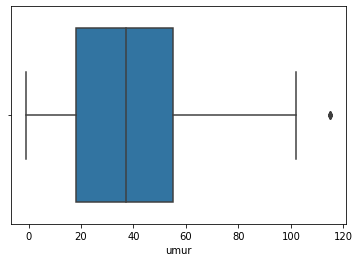

In [ ]:
sns.boxplot(x=data['umur'])

In [ ]:
q1=data['umur'].quantile(0.25)
q3=data['umur'].quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr

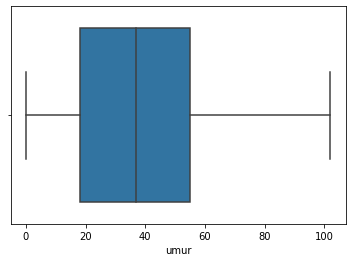

In [ ]:
data = data.drop(data[(data['umur']>ul)].index)
data = data.drop(data[(data['umur']<0)].index)
sns.boxplot(x=data['umur'])

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110521 entries, 21431100000000.0 to 792587000000.0
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nomorappointment    110521 non-null  int64 
 1   jeniskelamin        110521 non-null  int64 
 2   tanggalpembuatan    110521 non-null  object
 3   tanggalappointment  110521 non-null  object
 4   umur                110521 non-null  int64 
 5   daerah              110521 non-null  object
 6   beasiswa            110521 non-null  int64 
 7   darahtinggi         110521 non-null  int64 
 8   diabetes            110521 non-null  int64 
 9   alkohol             110521 non-null  int64 
 10  disabled            110521 non-null  int64 
 11  sms_received        110521 non-null  int64 
 12  no_show             110521 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 11.8+ MB


,nomorappointment,jeniskelamin,umur,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show
count,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,5.675304e+06,0.649958,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034,0.201916
std,7.129576e+04,0.476985,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876,0.401432
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640285e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680569e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725523e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.790484e+06,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


**3. Summary data berdasarkan daerah dengan lima daerah no-show terendah dan tertinggi**

5 Daerah No-show Tertinggi

<function matplotlib.pyplot.show>

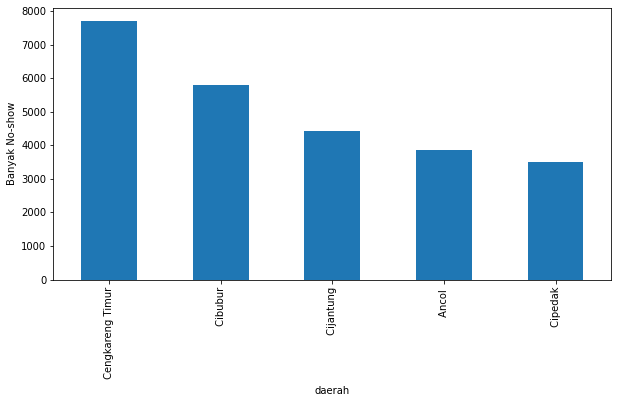

In [ ]:
data.groupby(["daerah"])["no_show"].count().nlargest(5).plot(kind="bar", figsize=(10,5))
plt.ylabel("Banyak No-show")
plt.show

5 Daerah No-show Terendah

<function matplotlib.pyplot.show>

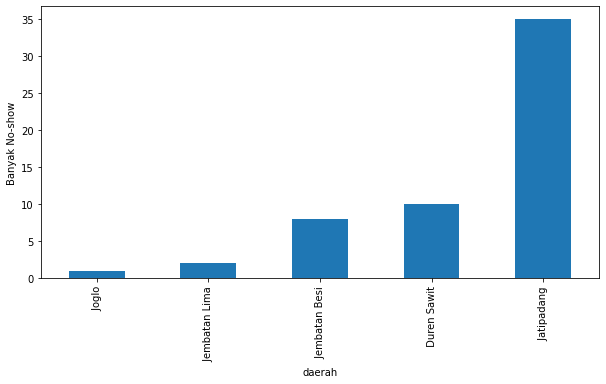

In [ ]:
data.groupby(["daerah"])["no_show"].count().nsmallest(5).plot(kind="bar", figsize=(10,5))
plt.ylabel("Banyak No-show")
plt.show

**4. summary data berdasarkan selisih tanggal appointment dan janji**

In [ ]:
data.tanggalappointment = pd.to_datetime(data.tanggalappointment)
data.tanggalpembuatan = pd.to_datetime(data.tanggalpembuatan)
data['selisih_waktu'] = (data['tanggalappointment'] - data['tanggalpembuatan']).dt.days
data.describe()

,nomorappointment,jeniskelamin,umur,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show,selisih_waktu
count,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,5.675304e+06,0.649958,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034,0.201916,9.183721
std,7.129576e+04,0.476985,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876,0.401432,15.255082
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,5.640285e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,5.680569e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,5.725523e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,5.790484e+06,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


<function matplotlib.pyplot.show>

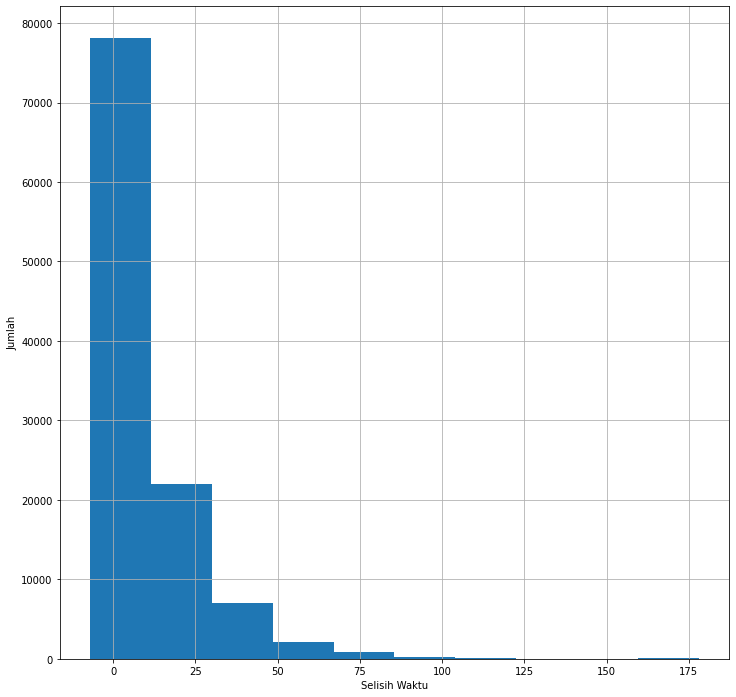

In [ ]:
data['selisih_waktu'].hist(figsize=(12,12))
plt.xlabel("Selisih Waktu")
plt.ylabel("Jumlah")
plt.show

**5. Cek korelasi antara feature ke variable No-show**

In [ ]:
data.corr()

,nomorappointment,jeniskelamin,umur,beasiswa,darahtinggi,diabetes,alkohol,disabled,sms_received,no_show,selisih_waktu
nomorappointment,1.000000,-0.018511,-0.019132,0.022622,0.012749,0.022634,0.032948,0.014113,-0.256629,-0.162587,-0.771826
jeniskelamin,-0.018511,1.000000,0.106369,0.114308,0.055724,0.032566,-0.106162,-0.022989,0.046312,0.004089,0.028408
umur,-0.019132,0.106369,1.000000,-0.092437,0.504726,0.292509,0.095862,0.077369,0.012676,-0.060497,0.034804
beasiswa,0.022622,0.114308,-0.092437,1.000000,-0.019731,-0.024899,0.035019,-0.008520,0.001188,0.029150,-0.030422
darahtinggi,0.012749,0.055724,0.504726,-0.019731,1.000000,0.433096,0.087972,0.080249,-0.006309,-0.035673,-0.017223
diabetes,0.022634,0.032566,0.292509,-0.024899,0.433096,1.000000,0.018471,0.057629,-0.014555,-0.015170,-0.027189
alkohol,0.032948,-0.106162,0.095862,0.035019,0.087972,0.018471,1.000000,0.004689,-0.026151,-0.000189,-0.038520
disabled,0.014113,-0.022989,0.077369,-0.008520,0.080249,0.057629,0.004689,1.000000,-0.024026,-0.006381,-0.019869
sms_received,-0.256629,0.046312,0.012676,0.001188,-0.006309,-0.014555,-0.026151,-0.024026,1.000000,0.126478,0.398155
no_show,-0.162587,0.004089,-0.060497,0.029150,-0.035673,-0.015170,-0.000189,-0.006381,0.126478,1.000000,0.186225


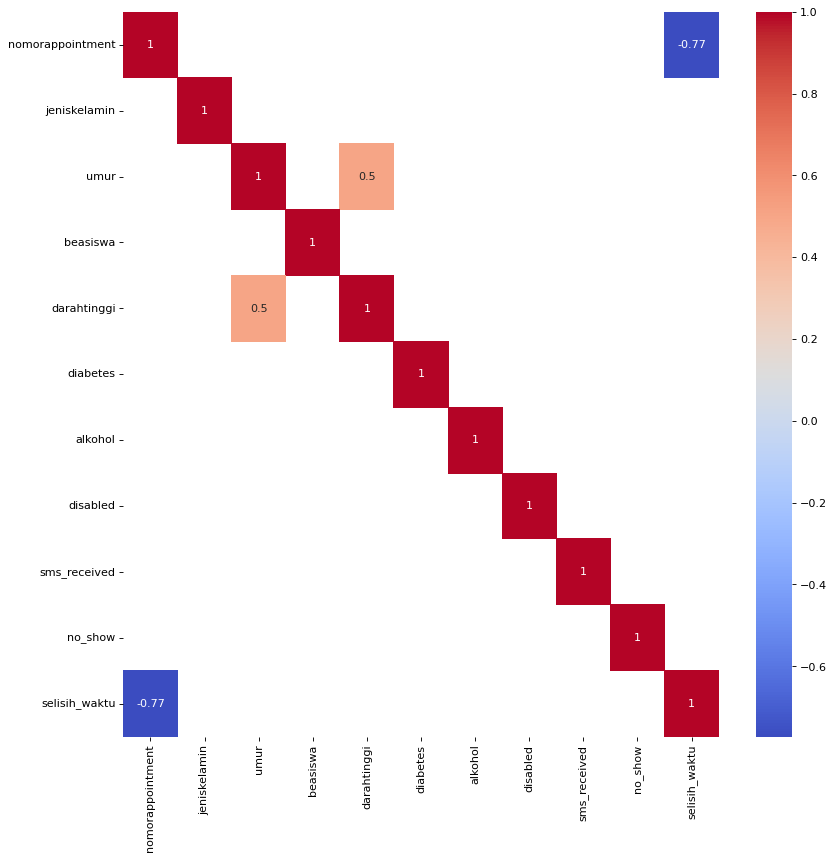

In [ ]:
cr = data.corr()
plt.figure(figsize=(12,12), dpi = 80)
sns.heatmap(cr[(cr>0.5)|(cr<-0.5)],annot=True,cmap='coolwarm')

**6. Regresi linear/logistik untuk memprediksi No-show**

In [ ]:
sm.OLS.from_formula('no_show ~ jeniskelamin + umur + beasiswa + darahtinggi + diabetes + alkohol + disabled + sms_received + selisih_waktu', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                no_show   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     558.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        04:53:42   Log-Likelihood:                -53490.
No. Observations:              110521   AIC:                         1.070e+05
Df Residuals:                  110511   BIC:                         1.071e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1820      0.003     64.159      0.000       0.176       0.188
jeniskelamin      0.0017      0.003      0.653      0.514      -0.003       0.007
umur             -0.0012   6.04e-05    -19.421      0.000      -0.001      -0.001
beasiswa          0.0370      0.004      9.179      0.000       0.029       0.045
darahtinggi      -0.0047      0.004     -1.287      0.198      -0.012       0.002
diabetes          0.0189      0.005      3.708      0.000       0.009       0.029
alkohol           0.0320      0.007      4.584      0.000       0.018       0.046
disabled          0.0087      0.007      1.186      0.236      -0.006       0.023
sms_received      0.0532      0.003     19.276      0.000       0.048       0.059
selisih_waktu     0.0044   8.46e-05     51.492      0.000       0.004       0.005
==============================================================================
Omnibus:                    20878.279   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35484.390
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                       3.222   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""